In [31]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
from metrics import accuracy

from sklearn import datasets
from sklearn.model_selection import train_test_split

# Perceptron

Is used for a type of linear and binary classification problems.

The building block of neural networks (neural network unit).   
Simulates the behavior of a neuron in our brains (an artificial neuron).   
Input -> Weights -> Function(feature vector) -> Step function (activation)

Interesting article on it's long history, mathematical background and use cases by Joseph Robinson.   
<a href="https://towardsdatascience.com/the-definitive-perceptron-guide-fd384eb93382#:~:text=Even%20though%20the%20perceptron%20model,sigmoid)%20function%20%5B10%5D.">Article: From Basic Gates to Deep Neural Networks: The Definitive Perceptron Tutorial</a>

### Underlying Math 
$predicted = stepfunction(w^T * x + b)$

Update w   
$w = w + a * (y_i-\hat y_i) * x_i$

Intuition: The weights are only updated when either 0 is the class but 1 is predicted or vice versa. Otherwise 0 - 0 or 1 - 1 doesn't change the weights.  

In [32]:
class Perceptron:
    def __init__(self, lr=0.01, n_iter=100):
        self.lr = lr
        self.n_iter = n_iter
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def _unit_step_func(self, x):
        return np.where(x>=0, 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        y_conv = np.array([1 if i >0 else 0 for i in y])

        for _ in range(self.n_iter):
            for id, x in enumerate(X):
                linear = np.dot(x, self.weights) + self.bias
                y_pred = self.activation_func(linear)
                self.weights += self.lr * (y[id] - y_pred) * x
                self.bias += self.lr * (y[id] - y_pred)


    def predict(self, X):
        linear = np.dot(X, self.weights) + self.bias
        return self.activation_func(linear)


In [33]:
X, y = datasets.make_blobs(n_samples=200, n_features=2, centers=2, cluster_std=1.3, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [34]:
perc = Perceptron(lr=0.1, n_iter=500)
perc.fit(X_train, y_train)
predicted = perc.predict(X_test)

accuracy(y_test, predicted)

0.925

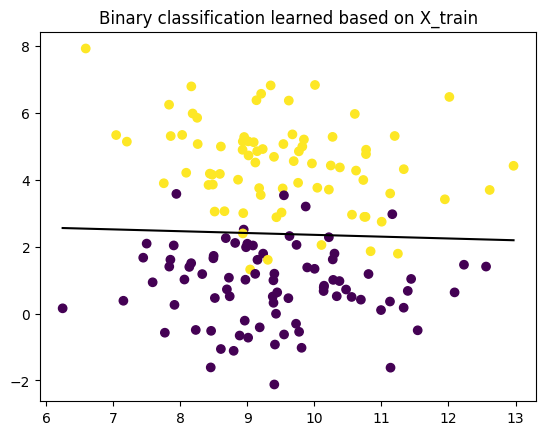

In [37]:
plt.scatter(X_train[:,0], X_train[:,1], marker='o', c=y_train)
x0_1 = np.amin(X_train[:,0])
x0_2 = np.amax(X_train[:,0])
x1_1 = (-perc.weights[0] * x0_1 - perc.bias) / perc.weights[1]
x1_2 = (-perc.weights[0] * x0_2 - perc.bias) / perc.weights[1]
plt.plot([x0_1, x0_2], [x1_1, x1_2], 'k')
plt.title("Binary classification learned based on X_train")
plt.show()